## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Luís Fonseca
## Número: 45125

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (840 amostras)
### 2. "y":              classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Com a métrica de distância de cosseno, calcule a matriz de confusão e o número total de erros nos dados de teste.

Pergunta 1:  dict_keys(['X', 'y', 'foldTrain', 'foldTest'])
Classe 0 Média:  [ 5.14228406 -3.01407307]
Classe 1 Média:  [-3.25743758 -2.53544477]
Classe 2 Média:  [-1.68691942  1.46970542]
Classe 3 Média:  [0.11366889 5.28098864]

Matriz e número total de erros
[[53  0  0  0]
 [ 0 60  0  0]
 [ 0 10 41  2]
 [ 0  0  2 50]]
Número total de erros: 14
Probabilidade total de erros: 1.6666666666666667 %


NameError: name 'spd' is not defined

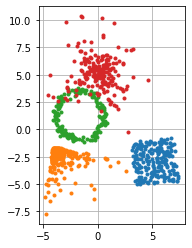

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

fName = 'Lab2Data.p'
D = pickle.load(open(fName, 'rb'))

print("Pergunta 1: ",D.keys())

X = D['X']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']

plt.plot(X[0,y==0],X[1,y==0],'.')
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.axis('scaled')
plt.grid(True)

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

m0 = np.mean(X1[:, y1==0], axis=1)
m1 = np.mean(X1[:, y1==1], axis=1)
m2 = np.mean(X1[:, y1==2], axis=1)
m3 = np.mean(X1[:, y1==3], axis=1)

print("Classe 0 Média: ",m0)
print("Classe 1 Média: ",m1)
print("Classe 2 Média: ",m2)
print("Classe 3 Média: ",m3)
print()


D0 = np.sqrt(np.sum((X1-m0[:,np.newaxis])**2, axis=0))
D1 = np.sqrt(np.sum((X1-m1[:,np.newaxis])**2, axis=0))
D2 = np.sqrt(np.sum((X1-m2[:,np.newaxis])**2, axis=0))
D3 = np.sqrt(np.sum((X1-m3[:,np.newaxis])**2, axis=0))

D = np.vstack((D0, D1, D2, D3))
y1e = np.argmin(D, axis=0)

MC = confusion_matrix(y1, y1e)
print("Matriz e número total de erros")
print(MC)
print("Número total de erros:", np.sum(y1!=y1e))
print("Probabilidade total de erros:", (np.sum(y1!=y1e)/840)*100, "%")

Dc = spd.squareform(spd.pdist(X1.T, 'cosine'))
y1e = np.argmin(Dc, axis=0)

MC = confusion_matrix(y1, y1e)
print(MC)
print("Número total de erros:", np.sum(y1!=y1e))
print("Probabilidade total de erros:", (np.sum(y1!=y1e)/840)*100, "%")

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X1 = X[:, f1].T
X2 = X[:, f2].T

y1 = y[f1]
y2 = y[f2]

plt.plot(y1)
plt.show()

print("Com 1 vizinho:")
print()
knn = KNeighborsClassifier(n_neighbors=1).fit(X1, y1)
y2e = knn.predict(X2)
print(np.sum(y2e!=y2), "Erros")
print(confusion_matrix(y2, y2e))
print()

plt.plot(X2.T[0,y2==0] ,X2.T[1,y2==0], '.')
plt.plot(X2.T[0,y2==1] ,X2.T[1,y2==1], '.')
plt.plot(X2.T[0,y2==2] ,X2.T[1,y2==2], '.')
plt.plot(X2.T[0,y2==3] ,X2.T[1,y2==3], '.')
plt.plot(X2[y2!=y2e,0],X2[y2!=y2e,1], 'ok', alpha=.3)
plt.show()

print("Com 5 vizinhos:")
print()
knn = KNeighborsClassifier(n_neighbors=5).fit(X1, y1)
y2e = knn.predict(X2)
print(np.sum(y2e!=y2), "Erros")
print(confusion_matrix(y2, y2e))
print()

plt.plot(X2.T[0,y2==0] ,X2.T[1,y2==0], '.')
plt.plot(X2.T[0,y2==1] ,X2.T[1,y2==1], '.')
plt.plot(X2.T[0,y2==2] ,X2.T[1,y2==2], '.')
plt.plot(X2.T[0,y2==3] ,X2.T[1,y2==3], '.')
plt.plot(X2[y2!=y2e,0],X2[y2!=y2e,1], 'ok', alpha=.3)
plt.show()